<a href="https://colab.research.google.com/github/easycastle/data-science-basic/blob/main/unitedAir2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:

united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


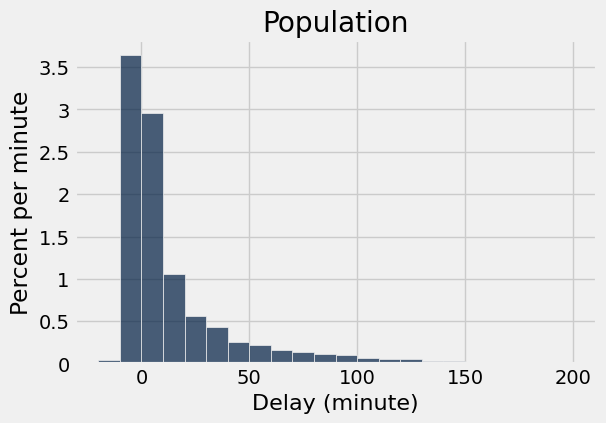

In [ ]:
delay_bins = np.arange(-20, 201, 10)
united.select('Delay').hist(bins = delay_bins, unit = 'minute')
plots.title('Population');

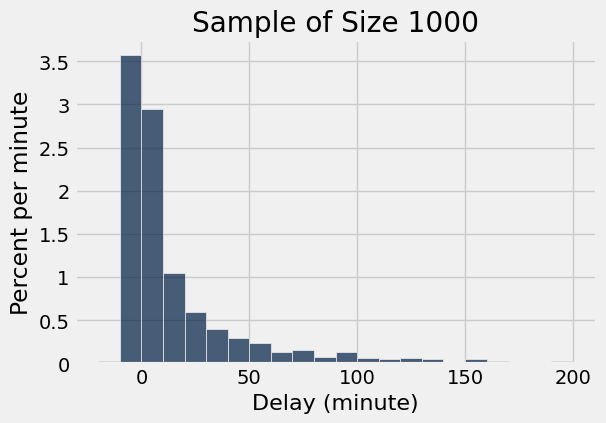

In [ ]:
sample_1000 = united.sample(1000)
sample_1000.select('Delay').hist(bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000');

In [ ]:
np.median(united.column('Delay'))

2.0

In [ ]:
united.where('Delay', are.below_or_equal_to(2)).num_rows/united.num_rows

0.5018444846292948

In [ ]:
united.where('Delay', are.equal_to(2)).num_rows

480

In [ ]:
np.median(sample_1000.column('Delay'))

3.0

In [ ]:
np.median(united.sample(1000).column('Delay'))

2.0

In [ ]:
medians = make_array()
for i in np.arange(5000):
  new_median = np.median(united.sample(1000).column('Delay'))
  medians = np.append(medians, new_median)
Table().with_column('Sample Median', medians)

Sample Median
2
2
3
2
3
2
3
2
2
2


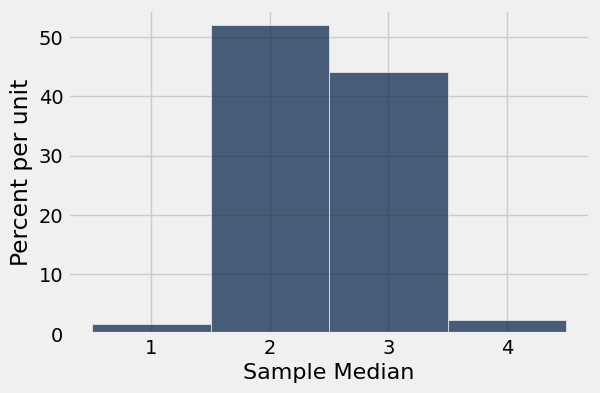

In [ ]:
Table().with_column('Sample Median', medians).hist(bins=np.arange(0.5, 5, 1))